## Dense Model

In [12]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [13]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


In [14]:
x_train = x_train.reshape((len(x_train), x_train.shape[1] * x_train.shape[2]))
x_test = x_test.reshape((len(x_test), x_test.shape[1] * x_test.shape[2]))
print(x_train.shape, x_test.shape)

(60000, 784) (10000, 784)


In [15]:
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, train_size = 0.7)
print( x_train.shape, x_val.shape)
print( y_train.shape, y_val.shape)

(42000, 784) (18000, 784)
(42000,) (18000,)


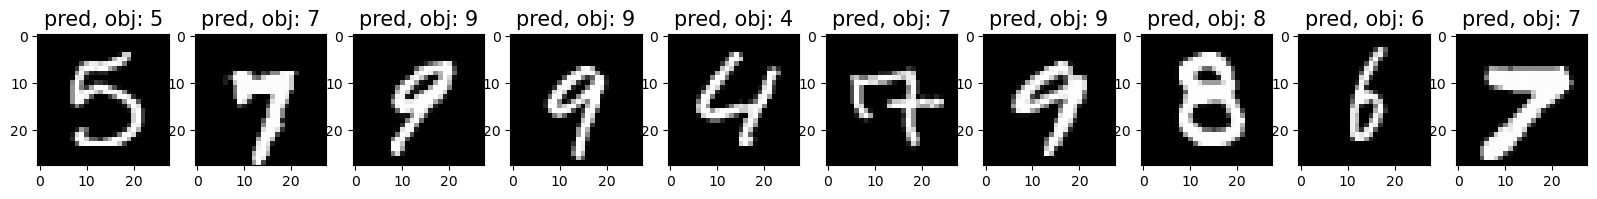

In [16]:
plt.figure(figsize=(20,4))

inicial = 0

for index, (imagen, etiqueta) in enumerate(zip(x_train[inicial:inicial+10], y_train[inicial:inicial+10])):
 plt.subplot(1, 10, index + 1)
 plt.imshow(np.reshape(imagen, (28,28)), cmap=plt.cm.gray)
 plt.title('pred, obj: ' +str(etiqueta), fontsize = 15)

In [17]:
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [18]:
print(y_train[56])
y_train = to_categorical(y_train, 10)
y_val = to_categorical(y_val, 10)
y_test = to_categorical(y_test, 10)
print(y_train[56])

0
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [19]:
model = Sequential()
model.add(Dense(64, input_shape=(784,), activation='sigmoid'))
model.add(Dense(64, activation='sigmoid'))
model.add(Dense(10, activation='softmax'))
model.summary()

2024-07-14 20:45:37.356087: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M2
2024-07-14 20:45:37.356203: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 8.00 GB
2024-07-14 20:45:37.356243: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 2.67 GB
2024-07-14 20:45:37.357063: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:303] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-07-14 20:45:37.357389: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:269] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                50240     
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dense_2 (Dense)             (None, 10)                650       
                                                                 
Total params: 55050 (215.04 KB)
Trainable params: 55050 (215.04 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


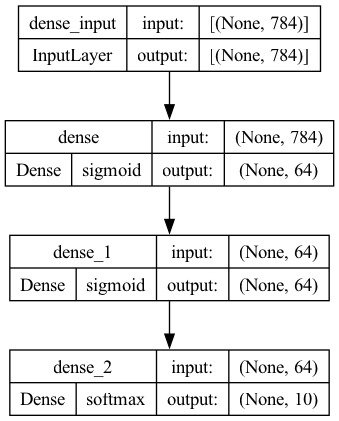

In [20]:
from tensorflow.keras.utils import plot_model

plot_model(model, to_file='images/mnist_dense_model.png', show_shapes=True, show_layer_names=True, show_layer_activations=True)

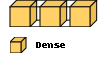

In [21]:
import visualkeras
visualkeras.layered_view(model,legend=True)

In [22]:

model.compile(
    optimizer=tf.keras.optimizers.Adam(0.001),
    loss='mean_squared_error',
    metrics = ['accuracy']
)

In [23]:
history = model.fit(x_train, y_train, validation_data = (x_val, y_val), epochs = 80, batch_size = 128, verbose = 1)

Epoch 1/80


2024-07-14 20:46:24.186018: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


329/329 [==============================] - ETA: 0s - loss: 0.0503 - accuracy: 0.6737

2024-07-14 20:46:29.969195: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


329/329 [==============================] - 7s 8ms/step - loss: 0.0503 - accuracy: 0.6737 - val_loss: 0.0249 - val_accuracy: 0.8593
Epoch 2/80
329/329 [==============================] - 2s 6ms/step - loss: 0.0201 - accuracy: 0.8787 - val_loss: 0.0184 - val_accuracy: 0.8847
Epoch 3/80
329/329 [==============================] - 2s 6ms/step - loss: 0.0171 - accuracy: 0.8917 - val_loss: 0.0169 - val_accuracy: 0.8893
Epoch 4/80
329/329 [==============================] - 2s 6ms/step - loss: 0.0157 - accuracy: 0.8995 - val_loss: 0.0161 - val_accuracy: 0.8941
Epoch 5/80
329/329 [==============================] - 2s 6ms/step - loss: 0.0148 - accuracy: 0.9029 - val_loss: 0.0156 - val_accuracy: 0.8956
Epoch 6/80
329/329 [==============================] - 2s 6ms/step - loss: 0.0143 - accuracy: 0.9063 - val_loss: 0.0147 - val_accuracy: 0.9029
Epoch 7/80
329/329 [==============================] - 2s 6ms/step - loss: 0.0136 - accuracy: 0.9111 - val_loss: 0.0141 - val_accuracy: 0.9078
Epoch 8/80
329/32

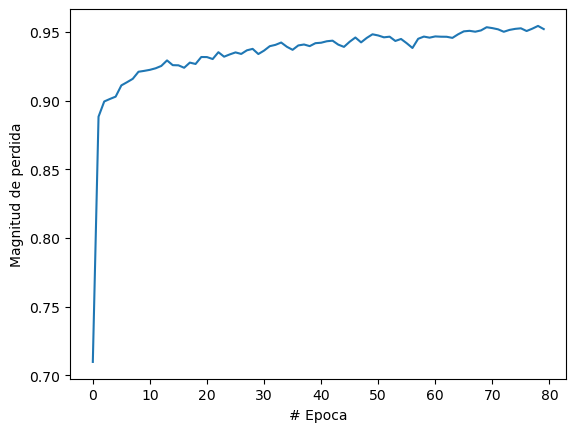

In [95]:
plt.xlabel("# Epoca")
plt.ylabel("Magnitud de perdida")
plt.plot(history.history["accuracy"])

In [96]:
pred1 = model.predict(x_test)
print(pred1)
print(pred1.shape)

2023-10-12 12:41:58.951474: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


313/313 [==============================] - 1s 2ms/step
[[1.13531769e-06 1.60907223e-06 1.78554692e-04 ... 9.99746978e-01
  6.94297341e-06 1.92107927e-05]
 [8.98097994e-07 2.74157919e-05 9.99706686e-01 ... 3.44107411e-06
  1.25851493e-05 3.36094619e-09]
 [9.21557586e-09 9.95795727e-01 2.29393877e-03 ... 1.27775280e-03
  2.70107645e-04 1.12230282e-05]
 ...
 [3.01381715e-06 2.49293322e-07 1.80786867e-06 ... 3.24487919e-04
  1.20750945e-02 1.42397834e-02]
 [7.18243609e-05 1.00428973e-04 3.86955071e-06 ... 1.49023792e-04
  5.98124415e-03 5.75556362e-04]
 [1.45789032e-04 2.81279142e-07 2.34187144e-04 ... 7.50290155e-07
  6.16827674e-05 3.35471645e-06]]
(10000, 10)


In [97]:
pred1_dec = np.argmax(pred1, axis = 1)
print(pred1_dec[10])
label = np.argmax(y_test,axis = 1)
print(label[10])

0
0


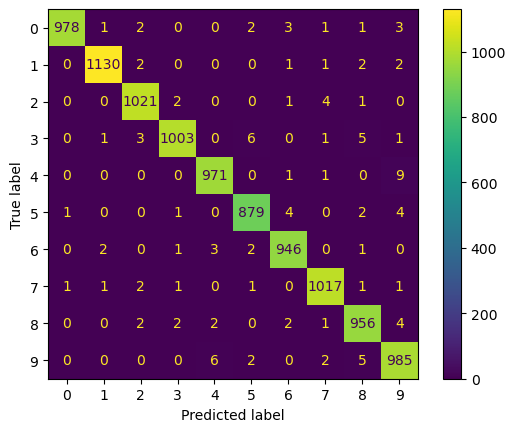

In [98]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_pred_label, y_real)

## Convolutional Model

# Lenet-5

In [99]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

print(x_train.shape, x_test.shape)

(60000, 28, 28) (10000, 28, 28)


In [100]:
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, train_size = 0.7)
print( x_train.shape, x_val.shape, x_test.shape)
print( y_train.shape, y_val.shape, y_test.shape)

(42000, 28, 28) (18000, 28, 28) (10000, 28, 28)
(42000,) (18000,) (10000,)


In [101]:
print(y_train[0])

nClasses = 10
y_train = to_categorical(y_train, nClasses)
y_val = to_categorical(y_val, nClasses)
y_test = to_categorical(y_test, nClasses)

print(y_train[0])

7
[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


In [102]:
x_train = x_train.reshape(x_train.shape[0], x_train.shape[1], x_train.shape[2], 1)
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1], x_test.shape[2], 1)
print(x_train.shape, x_test.shape)

(42000, 28, 28, 1) (10000, 28, 28, 1)


In [103]:
import keras
from keras.models import Sequential, Model
from keras.layers import Dense, Flatten, Activation
from keras.layers import Conv2D, MaxPooling2D

In [104]:
model = Sequential()

model.add(Conv2D(filters=6, kernel_size=(5,5), activation='sigmoid', input_shape=(28,28,1)))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=16, kernel_size=(5,5), activation='sigmoid'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(120, activation='sigmoid'))
model.add(Dense(84, activation='sigmoid'))

model.add(Dense(nClasses, activation='softmax'))

model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 24, 24, 6)         156       
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 12, 12, 6)         0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 8, 8, 16)          2416      
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 4, 4, 16)          0         
 g2D)                                                            
                                                                 
 flatten_2 (Flatten)         (None, 256)               0         
                                                                 
 dense_21 (Dense)            (None, 120)              

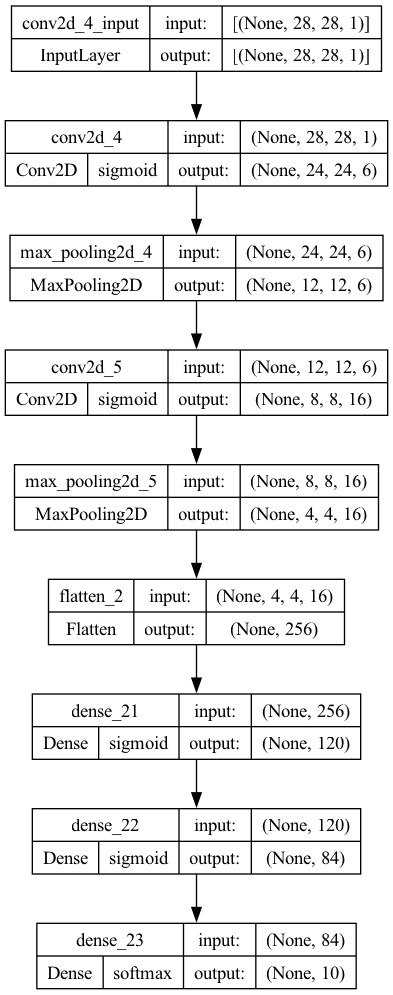

In [105]:
from tensorflow.keras.utils import plot_model

plot_model(model, to_file='images/mnist_lenet_model.png', show_shapes=True, show_layer_names=True, show_layer_activations=True)

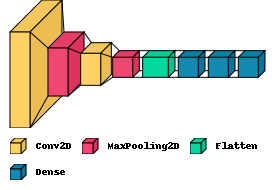

In [106]:
import visualkeras
visualkeras.layered_view(model,legend=True)

In [107]:
model.compile(
    optimizer = tf.keras.optimizers.Adam(0.001),
    loss = 'mean_squared_error',
    metrics = ['accuracy']
)

In [108]:
modelo_history = model.fit(x_train, y_train, validation_data = (x_val, y_val), epochs=100, batch_size=120, verbose=2)

Epoch 1/100


2023-10-12 12:42:01.360616: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-10-12 12:42:06.736890: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


350/350 - 7s - loss: 0.0474 - accuracy: 0.6350 - val_loss: 0.0127 - val_accuracy: 0.9283 - 7s/epoch - 20ms/step
Epoch 2/100
350/350 - 4s - loss: 0.0088 - accuracy: 0.9483 - val_loss: 0.0070 - val_accuracy: 0.9580 - 4s/epoch - 10ms/step
Epoch 3/100
350/350 - 4s - loss: 0.0058 - accuracy: 0.9642 - val_loss: 0.0054 - val_accuracy: 0.9666 - 4s/epoch - 10ms/step
Epoch 4/100
350/350 - 4s - loss: 0.0046 - accuracy: 0.9714 - val_loss: 0.0044 - val_accuracy: 0.9727 - 4s/epoch - 11ms/step
Epoch 5/100
350/350 - 4s - loss: 0.0039 - accuracy: 0.9760 - val_loss: 0.0040 - val_accuracy: 0.9746 - 4s/epoch - 10ms/step
Epoch 6/100
350/350 - 4s - loss: 0.0034 - accuracy: 0.9792 - val_loss: 0.0034 - val_accuracy: 0.9786 - 4s/epoch - 10ms/step
Epoch 7/100
350/350 - 4s - loss: 0.0031 - accuracy: 0.9807 - val_loss: 0.0033 - val_accuracy: 0.9794 - 4s/epoch - 10ms/step
Epoch 8/100
350/350 - 4s - loss: 0.0028 - accuracy: 0.9826 - val_loss: 0.0032 - val_accuracy: 0.9799 - 4s/epoch - 10ms/step
Epoch 9/100
350/350 

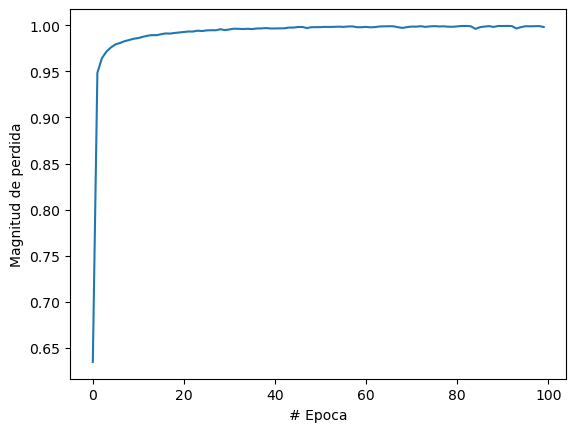

In [109]:
import matplotlib.pyplot as plt

plt.xlabel("# Epoca")
plt.ylabel("Magnitud de perdida")
plt.plot(modelo_history.history["accuracy"])

In [110]:
y_pred = model.predict(x_test)
print(y_pred.shape)
y_pred_label = np.argmax(y_pred, axis = 1)
print(y_pred_label)

y_real = np.argmax(y_test,axis = 1)
print(y_real)

2023-10-12 12:48:24.203705: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


313/313 [==============================] - 1s 3ms/step
(10000, 10)
[7 2 1 ... 4 5 6]
[7 2 1 ... 4 5 6]


In [111]:
target_names = ['avion', 'auto','ave', 'gato', 'ciervo', 'perro', 'rana', 'caballo', 'barco', 'camioneta']

y_pred = model.predict(x_test, verbose=1)
y_pred = np.argmax(y_pred, axis=1)

313/313 [==============================] - 1s 2ms/step


In [112]:
from sklearn.metrics import classification_report, confusion_matrix

# as I've trained my model on MNIST as odd or even (binary classes)
target_names = ['avion', 'auto','ave', 'gato', 'venado', 'perro', 'rana', 'caballo', 'barco', 'camioneta']

# get predict prob and label
y_pred = model.predict(x_test, verbose=1)
y_pred = np.argmax(y_pred, axis=1)

reporte = classification_report(np.argmax(y_test, axis=1), y_pred, target_names=target_names)
print(reporte)

313/313 [==============================] - 1s 2ms/step
              precision    recall  f1-score   support

       avion       0.99      1.00      0.99       980
        auto       0.99      0.99      0.99      1135
         ave       0.99      0.99      0.99      1032
        gato       0.99      0.99      0.99      1010
      venado       0.99      0.98      0.98       982
       perro       0.99      0.99      0.99       892
        rana       0.99      0.98      0.99       958
     caballo       0.99      0.99      0.99      1028
       barco       0.98      0.98      0.98       974
   camioneta       0.97      0.99      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



In [113]:
print(y_pred_label[25])
print(y_real[25])

0
0


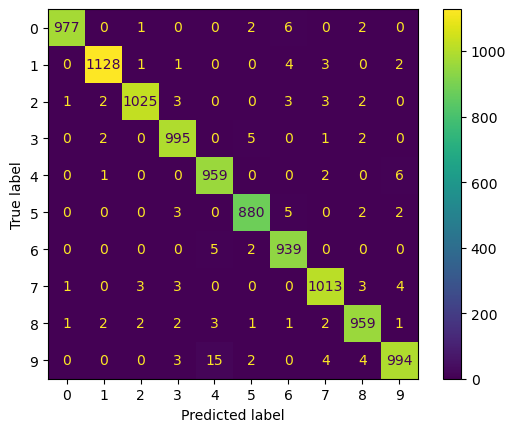

In [114]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_pred_label, y_real)